In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**Data Processing**

In [ ]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,text,airline_sentiment
0,568107472260624384,@southwestair Great job celebrating #MardiGras...,positive
1,568215698524246016,@southwestair thanks for taking it up a notch!...,positive
2,567842466851905536,@USAirways Being put back on hold for what has...,negative
3,568834824410148864,@united Thank you for your offer! All sorted o...,positive
4,569590527349252096,@JetBlue wondering if it's possible for my col...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1318 non-null   int64 
 1   text               1318 non-null   object
 2   airline_sentiment  1318 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


The table has 3 columns (tweet_id, text, airline_sentiment).

We are interested in the last two columns

In [ ]:
df["airline_sentiment"].value_counts()

negative    826
neutral     279
positive    213
Name: airline_sentiment, dtype: int64

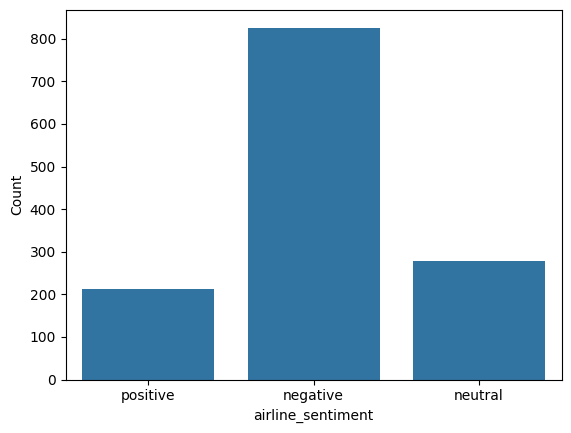

In [ ]:
sns.countplot(data=df, x='airline_sentiment')
plt.xlabel('airline_sentiment')
plt.ylabel('Count')
plt.show()

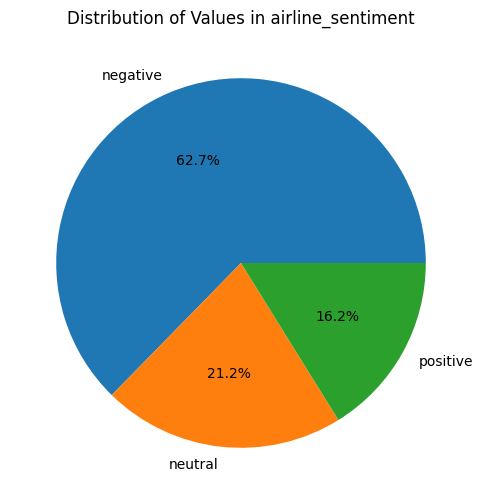

In [ ]:
counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Values in airline_sentiment')
plt.show()

Now lets extract the companies people talk about in the tweets

In [ ]:
df['text']

0       @southwestair Great job celebrating #MardiGras...
1       @southwestair thanks for taking it up a notch!...
2       @USAirways Being put back on hold for what has...
3       @united Thank you for your offer! All sorted o...
4       @JetBlue wondering if it's possible for my col...
                              ...                        
1313    @AmericanAir "sorry you were disappointed" #ou...
1314    @AmericanAir were stuck on a plane in Dallas t...
1315    @united Lost my wallet on flight 1007 yesterda...
1316    @USAirways Travelling from pwm to atl on Sunda...
1317                           @SouthwestAir thank you :)
Name: text, Length: 1318, dtype: object

# **Data cleaning & Deep analysis**

In [ ]:
def extract_word(string):
    return string.split("@")[1].split()[0]

In [ ]:
df['airline_company'] = df['text'].apply(lambda x: extract_word(x))

In [ ]:
df.head()

,tweet_id,text,airline_sentiment,airline_company
0,568107472260624384,@southwestair Great job celebrating #MardiGras...,positive,southwestair
1,568215698524246016,@southwestair thanks for taking it up a notch!...,positive,southwestair
2,567842466851905536,@USAirways Being put back on hold for what has...,negative,USAirways
3,568834824410148864,@united Thank you for your offer! All sorted o...,positive,united
4,569590527349252096,@JetBlue wondering if it's possible for my col...,neutral,JetBlue


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1318 non-null   int64 
 1   text               1318 non-null   object
 2   airline_sentiment  1318 non-null   object
 3   airline_company    1318 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.3+ KB


There are no mull values so lets continue

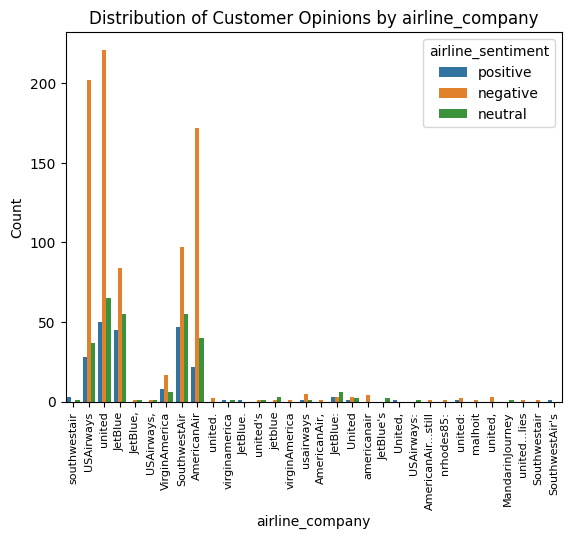

In [ ]:
sns.countplot(data=df, x='airline_company', hue='airline_sentiment')
plt.xlabel('airline_company')
plt.ylabel('Count')
plt.title('Distribution of Customer Opinions by airline_company')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

Looks confusing right?
Lets remove duplicates and correct the typos

In [ ]:
X = list(set(df['airline_company'].tolist()))
X

['usairways',
 'JetBlue',
 'MandarinJourney',
 "SouthwestAir's",
 'AmericanAir,',
 'united.',
 'united:',
 'JetBlue,',
 'United',
 'united...lies',
 'jetblue',
 'united,',
 'JetBlue:',
 'virginamerica',
 'nrhodes85:',
 'malhoit',
 "united's",
 'Southwestair',
 'southwestair',
 'USAirways',
 'USAirways,',
 'AmericanAir',
 'VirginAmerica',
 'JetBlue.',
 'USAirways:',
 'united',
 "JetBlue's",
 'United,',
 'americanair',
 'AmericanAir...still',
 'SouthwestAir',
 'virginAmerica']

In [ ]:
df.loc[df['airline_company'].str.contains("AmericanAir"), 'airline_company'] = "AmericanAir"
df.loc[df['airline_company'].str.contains("SouthwestAir"), 'airline_company'] = "SouthwestAir"
df.loc[df['airline_company'].str.contains("JetBlue"), 'airline_company'] = "JetBlue"
df.loc[df['airline_company'].str.contains("southwestair"), 'airline_company'] = "SouthwestAir"
df.loc[df['airline_company'].str.contains("virginamerica"), 'airline_company'] = "VirginAmerica"
df.loc[df['airline_company'].str.contains("usairways"), 'airline_company'] = "USAirways"
df.loc[df['airline_company'].str.contains("USAirways,"), 'airline_company'] = "USAirways"
df.loc[df['airline_company'].str.contains("USAirways,"), 'airline_company'] = "USAirways"
df.loc[df['airline_company'].str.contains("united"), 'airline_company'] = "United"
df.loc[df['airline_company'].str.contains("United,"), 'airline_company'] = "United"
df.loc[df['airline_company'].str.contains("Southwestair"), 'airline_company'] = "SouthwestAir"
df.loc[df['airline_company'].str.contains("virginAmerica"), 'airline_company'] = "VirginAmerica"
df.loc[df['airline_company'].str.contains("jetblue"), 'airline_company'] = "JetBlue"
df.loc[df['airline_company'].str.contains("USAirways:"), 'airline_company'] = "USAirways"
df.loc[df['airline_company'].str.contains("americanair:"), 'airline_company'] = "AmericanAir"
df.loc[df['airline_company'].str.contains("americanair"), 'airline_company'] = "AmericanAir"

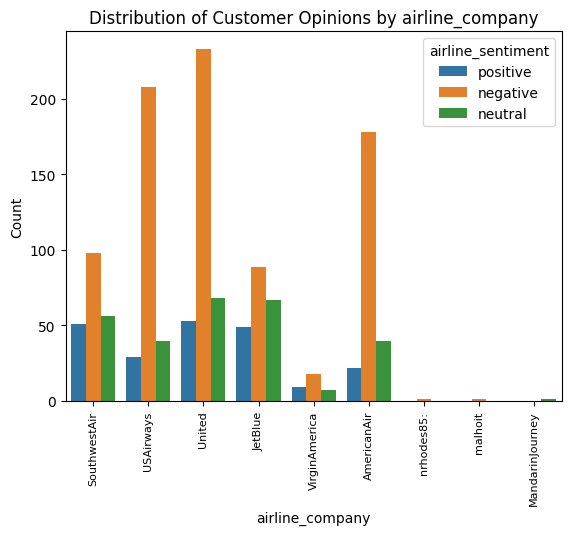

In [ ]:
sns.countplot(data=df, x='airline_company', hue='airline_sentiment')
plt.xlabel('airline_company')
plt.ylabel('Count')
plt.title('Distribution of Customer Opinions by airline_company')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

In [ ]:
df['airline_company'].value_counts()

United             354
USAirways          277
AmericanAir        240
SouthwestAir       205
JetBlue            205
VirginAmerica       34
nrhodes85:           1
malhoit              1
MandarinJourney      1
Name: airline_company, dtype: int64

Looks good now.



But what about the values with low counts?



We can consider them as outliers and delete them.



In [ ]:
values_to_delete = ['malhoit',"MandarinJourney",'nrhodes85:','VirginAmerica']
df = df[~df['airline_company'].isin(values_to_delete)]


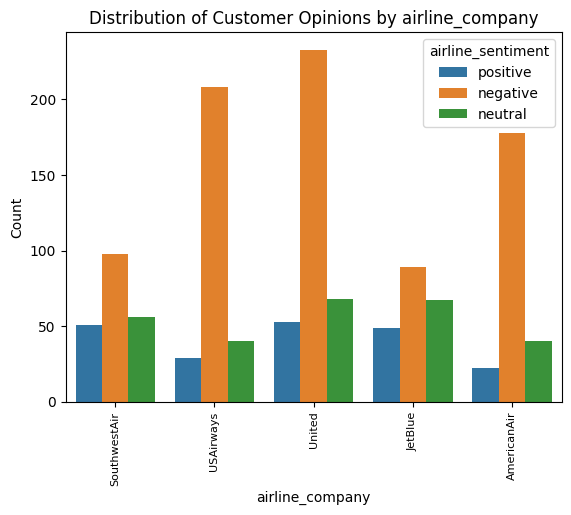

In [ ]:
sns.countplot(data=df, x='airline_company', hue='airline_sentiment')
plt.xlabel('airline_company')
plt.ylabel('Count')
plt.title('Distribution of Customer Opinions by airline_company')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

As we can see in the first plot, most of the tweets are negative. This can lead to bias in the model. To address this issue, we need to proceed with upsampling and downsampling techniques.

In [ ]:
from sklearn.model_selection import train_test_split


category_0 = df[df['airline_sentiment'] == 'positive']
category_1 = df[df['airline_sentiment'] == 'negative']
category_2 = df[df['airline_sentiment'] == 'neutral']

category_0_sampled = category_0.sample(n=438, random_state=42,replace=True)
category_1_sampled = category_1.sample(n=438, random_state=42,replace=True)
category_2_sampled = category_2.sample(n=438, random_state=42,replace=True)

balanced_df = pd.concat([category_0_sampled, category_1_sampled, category_2_sampled])

balanced_df = balanced_df.sample(frac=1, random_state=42)

In [ ]:
df2 = balanced_df[['text','airline_sentiment']]

Lets generates a word cloud visualization

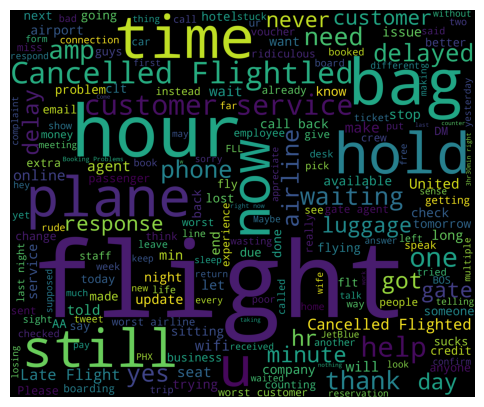

In [ ]:
from wordcloud import WordCloud,STOPWORDS

new_df=df2[df2['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(6, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

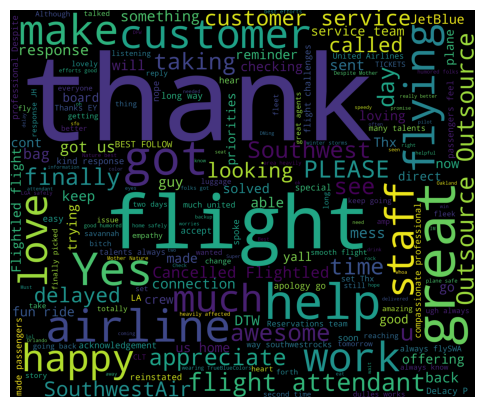

In [ ]:
new_df=df2[df2['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(6, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

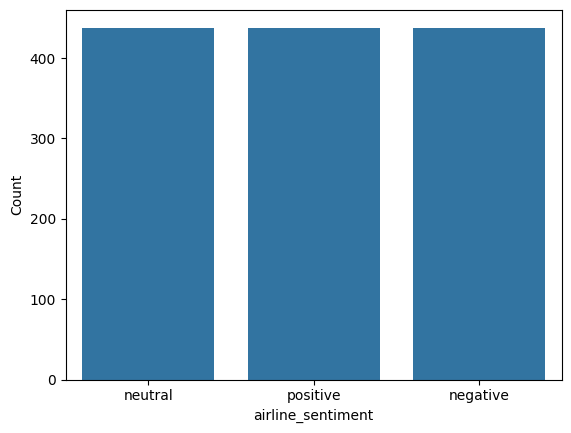

In [ ]:
sns.countplot(data=df2, x='airline_sentiment')
plt.xlabel('airline_sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Lets remove non-alphabetic character and stopwords

In [ ]:
import re
from nltk.corpus import stopwords

def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [ ]:
new_df = df2.copy()
new_df['clean_tweet'] = new_df['text'].apply(lambda x: tweet_to_words(x))
new_df.head()

,text,airline_sentiment,clean_tweet
456,@united Cancelled Flighting. bought a ticket f...,neutral,united cancelled flighting bought ticket frien...
799,@SouthwestAir got it squared away. Thank you. ...,positive,southwestair got squared away thank man inside...
265,@SouthwestAir can I get some luv with a fallow?,neutral,southwestair get luv fallow
867,@SouthwestAir good to be back. See you all aga...,positive,southwestair good back see several weeks
119,@united Got it. I am following the United page.,neutral,united got following united page


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 456 to 807
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               1314 non-null   object
 1   airline_sentiment  1314 non-null   object
 2   clean_tweet        1314 non-null   object
dtypes: object(3)
memory usage: 41.1+ KB


In [ ]:
final_df = new_df[['clean_tweet','airline_sentiment']]
final_df.head()

,clean_tweet,airline_sentiment
456,united cancelled flighting bought ticket frien...,neutral
799,southwestair got squared away thank man inside...,positive
265,southwestair get luv fallow,neutral
867,southwestair good back see several weeks,positive
119,united got following united page,neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
final_df['airline_sentiment'] = label_encoder.fit_transform(final_df['airline_sentiment'])
final_df.head()

<ipython-input-33-a63c165d7d56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['airline_sentiment'] = label_encoder.fit_transform(final_df['airline_sentiment'])


,clean_tweet,airline_sentiment
456,united cancelled flighting bought ticket frien...,1
799,southwestair got squared away thank man inside...,2
265,southwestair get luv fallow,1
867,southwestair good back see several weeks,2
119,united got following united page,1


Lets prepare for training the model

In [ ]:
train,test = train_test_split(final_df,test_size=0.2,random_state=42)

In [ ]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

Converting words to numeric vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [ ]:
print(test_features.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Now its time for preparing models

First model we will try is Decision tree classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

Accuracy of DecisionTreeClassifieris 0.8593155893536122
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        72
           1       0.88      0.76      0.82        93
           2       0.95      0.93      0.94        98

    accuracy                           0.86       263
   macro avg       0.86      0.86      0.85       263
weighted avg       0.87      0.86      0.86       263



<Figure size 640x480 with 0 Axes>

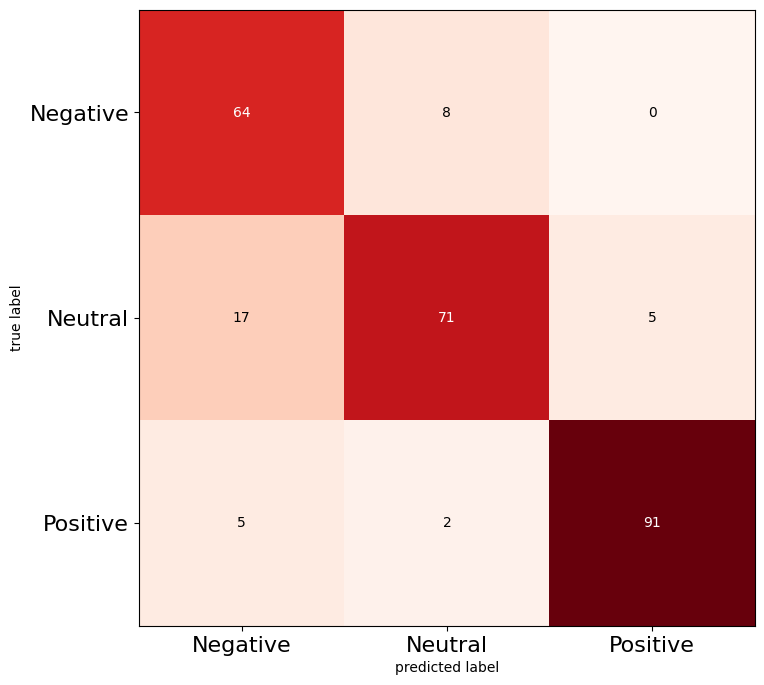

In [ ]:
model_1 = DecisionTreeClassifier()
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
try:
  fit = model_1.fit(train_features,train['airline_sentiment'])
  pred = fit.predict(test_features)
except Exception:
  fit = model_1.fit(dense_features,train['airline_sentiment'])
  pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['airline_sentiment'])
Accuracy.append(accuracy)
Model.append(model_1.__class__.__name__)
print('Accuracy of '+model_1.__class__.__name__+'is '+str(accuracy))
print(classification_report(pred,test['airline_sentiment']))
cm=confusion_matrix(pred , test['airline_sentiment'])
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

Second model will be Random forest classifier

Accuracy of RandomForestClassifieris 0.8745247148288974
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        72
           1       0.91      0.77      0.84        96
           2       0.96      0.97      0.96        95

    accuracy                           0.87       263
   macro avg       0.87      0.88      0.87       263
weighted avg       0.88      0.87      0.87       263



<Figure size 640x480 with 0 Axes>

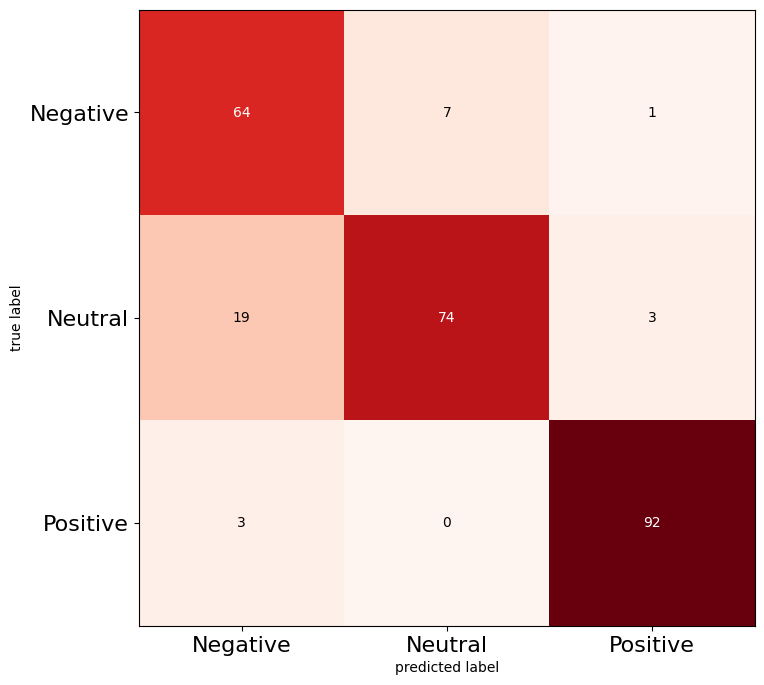

In [ ]:
model_2 = RandomForestClassifier(n_estimators=200)
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
try:
  fit = model_2.fit(train_features,train['airline_sentiment'])
  pred = fit.predict(test_features)
except Exception:
  fit = model_2.fit(dense_features,train['airline_sentiment'])
  pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['airline_sentiment'])
Accuracy.append(accuracy)
Model.append(model_2.__class__.__name__)
print('Accuracy of '+model_2.__class__.__name__+'is '+str(accuracy))
print(classification_report(pred,test['airline_sentiment']))
cm=confusion_matrix(pred , test['airline_sentiment'])
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()